In [1]:
%matplotlib notebook

import os
import subprocess
import nibabel as nib

import lib.motion
import lib.head_motion

/afs/csail.mit.edu/u/n/nmsingh/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
scannumber = 'MAP-C401-031615'
filename = 'PLACENTASTUDY_03162015_1.MR.0003_0000'
data_path = os.path.join('/data/vision/polina/projects/fetal_data/data/haste/Singleton-Control',scannumber,filename+'.nii.gz')
seg_path = os.path.join('/data/vision/polina/projects/fetal_data/data/haste/Singleton-Control-Segmentations',scannumber,filename+'-Segmentation-label.nii.gz')
img = nib.load(data_path).get_data()
sl = img[:,:,int(img.shape[2]/2)]
seg = nib.load(seg_path).get_data()
seg_sl = seg[:,:,int(seg.shape[2]/2)]

<IPython.core.display.Javascript object>


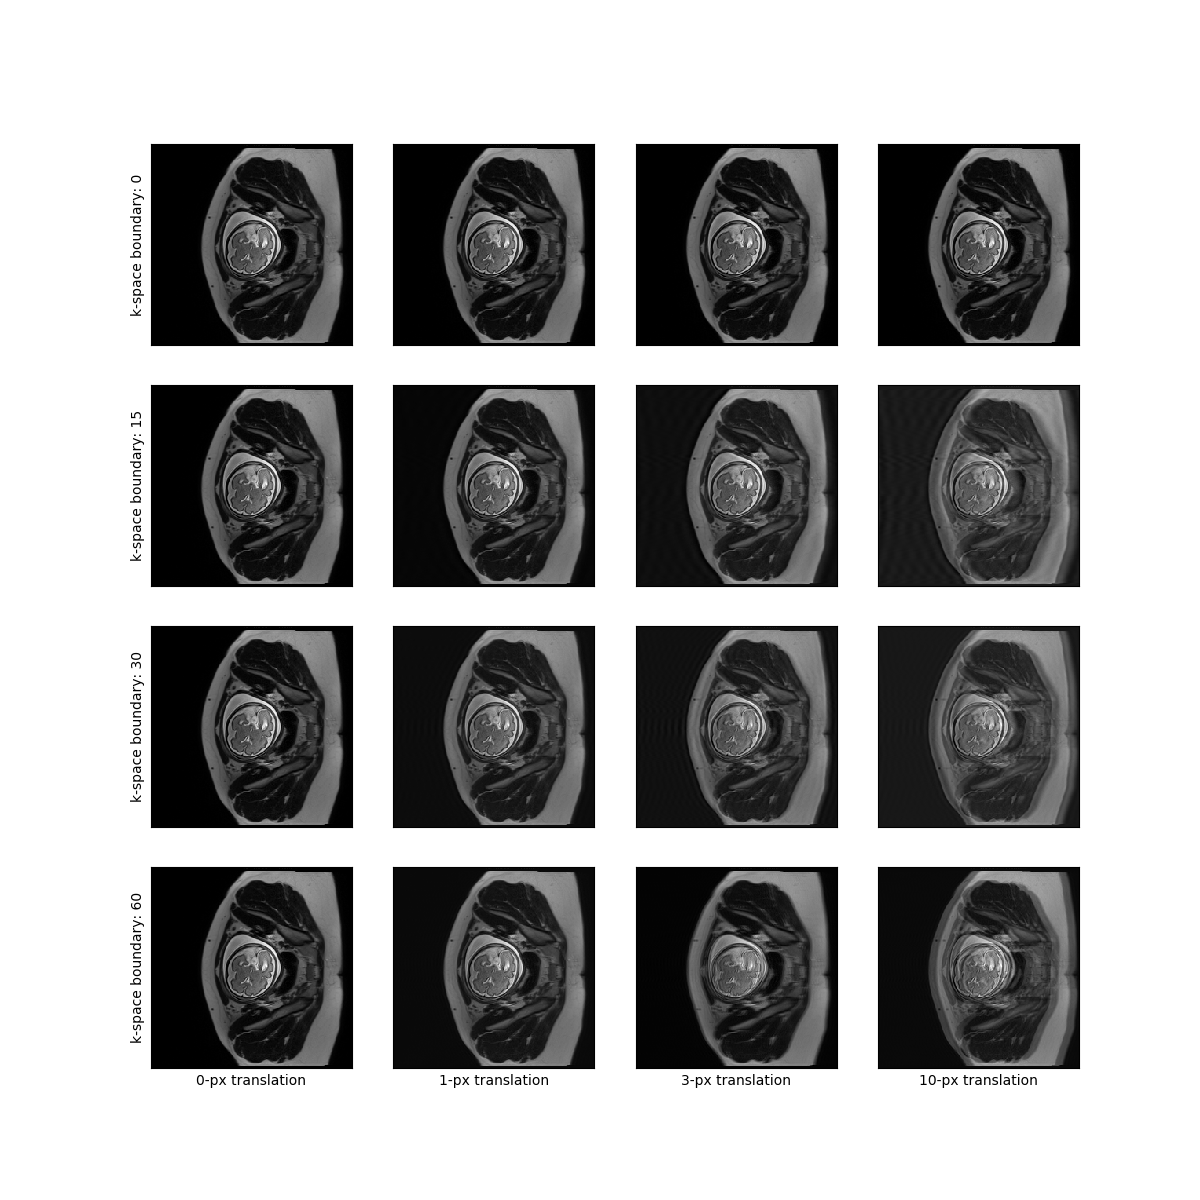

In [3]:
lib.motion.plot_horiz_trans(sl)

<IPython.core.display.Javascript object>


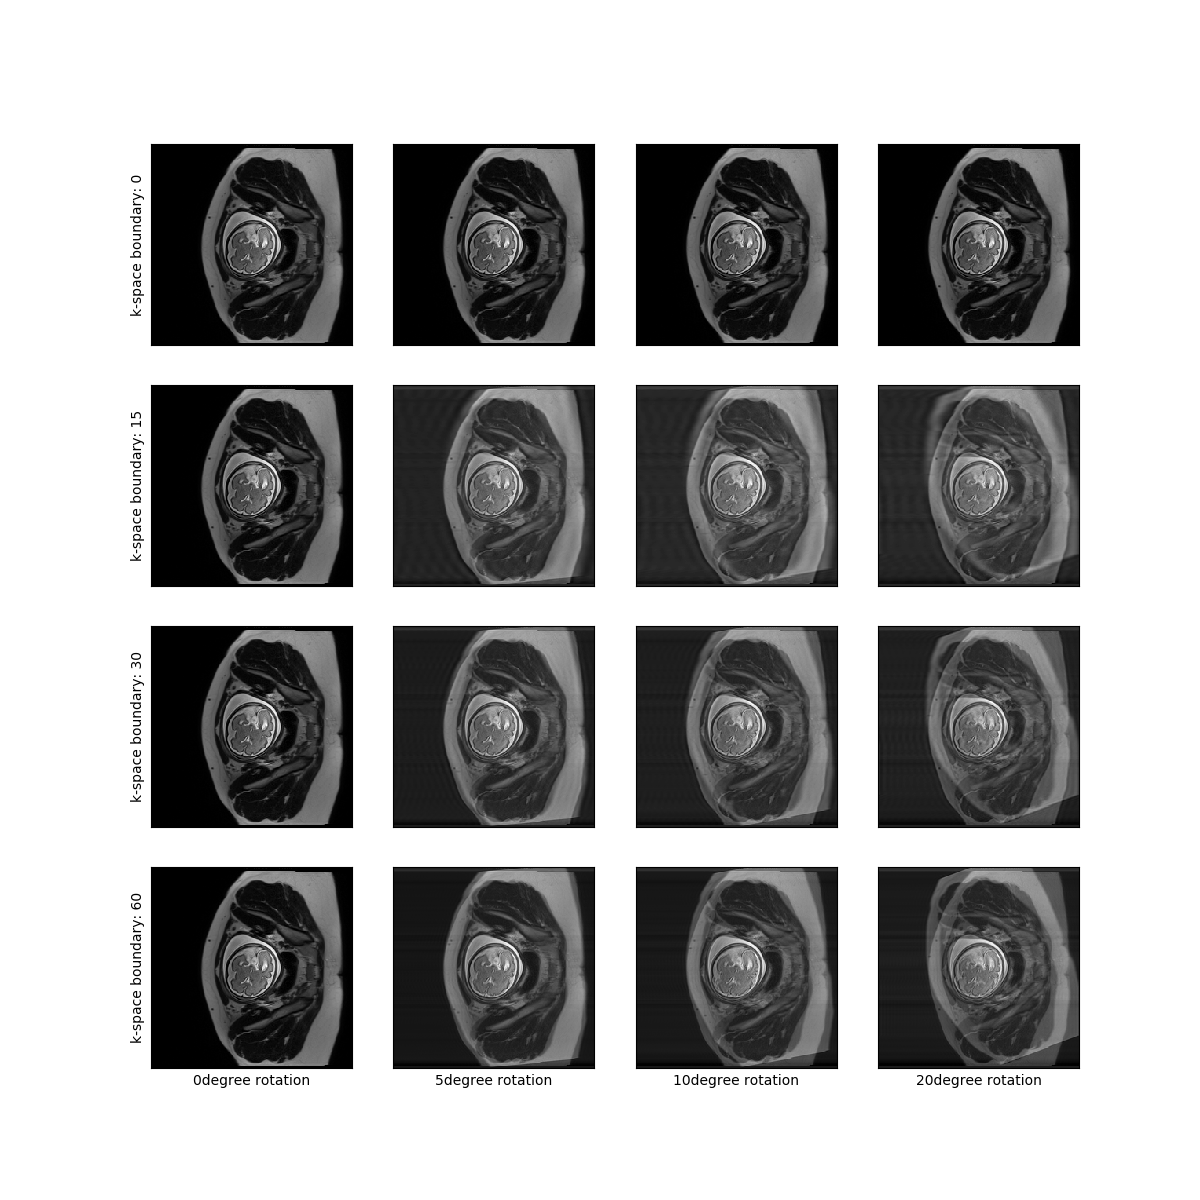

In [4]:
lib.motion.plot_rotation(sl)

<IPython.core.display.Javascript object>


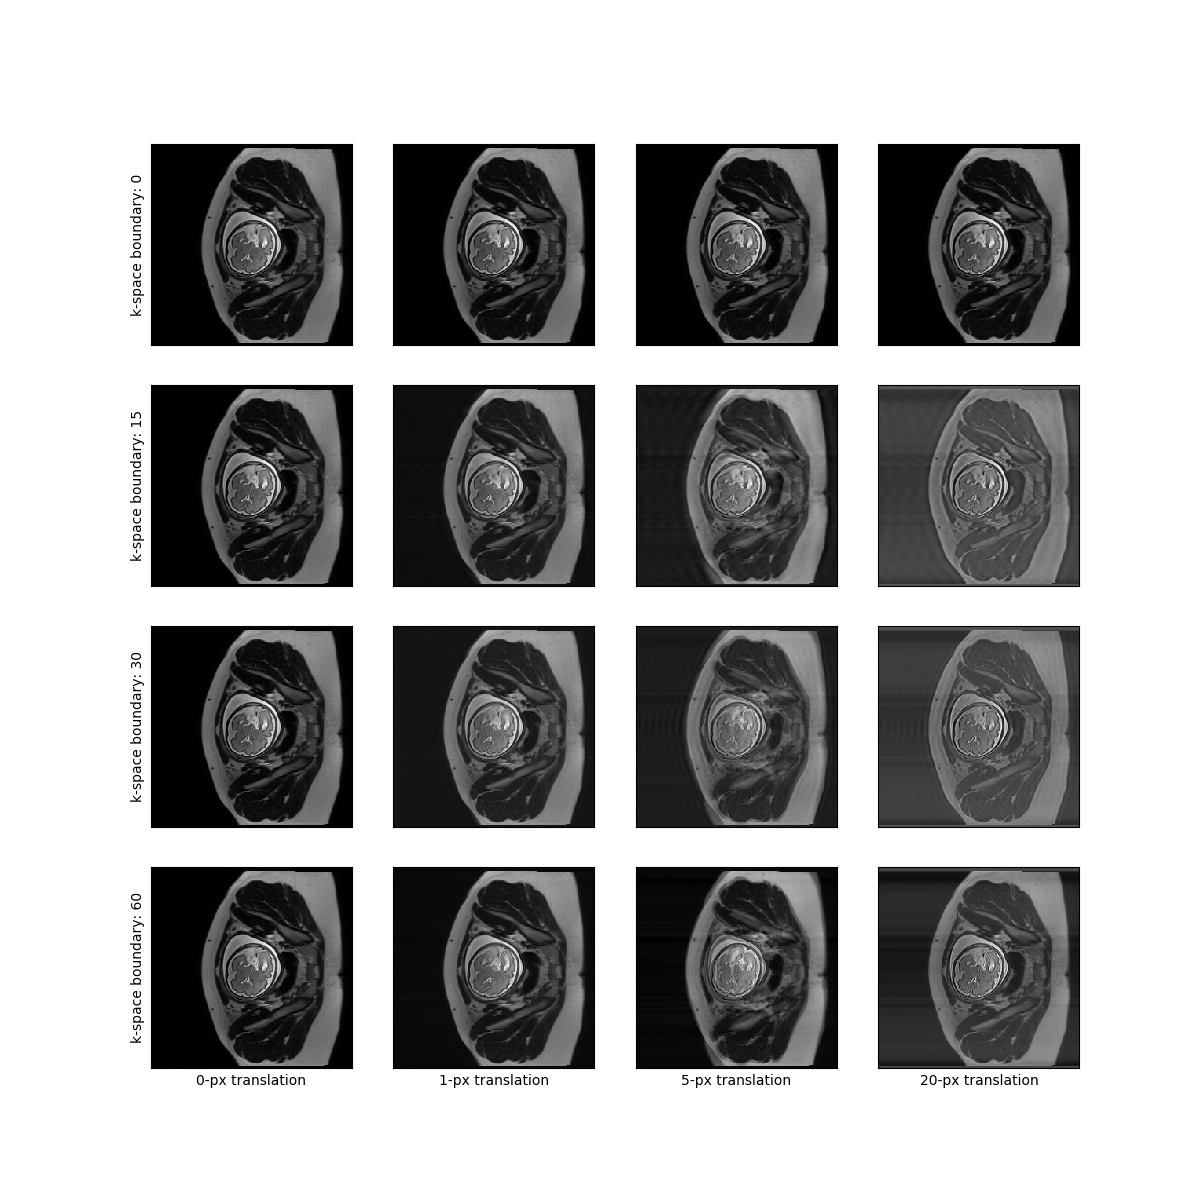

In [5]:
lib.motion.plot_oop_horiz_trans(img)

<IPython.core.display.Javascript object>


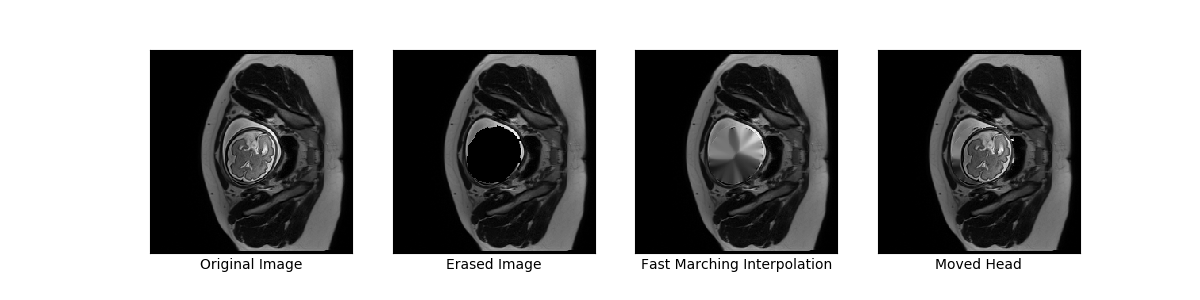

In [6]:
lib.head_motion.plot_single_head_slide(sl,seg_sl,10)